In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
df = pd.read_csv('data/shampoo_sales.csv')


In [92]:
def parser(X):
    X = X+ '-'+ '19'+X[:2]
    X = pd.to_datetime(X,format='%d-%b-%Y')
    return X

In [93]:
df['Month'] = df['Month'].apply(parser)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   36 non-null     datetime64[ns]
 1   Sales   36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


In [95]:
df.set_index('Month',inplace=True)

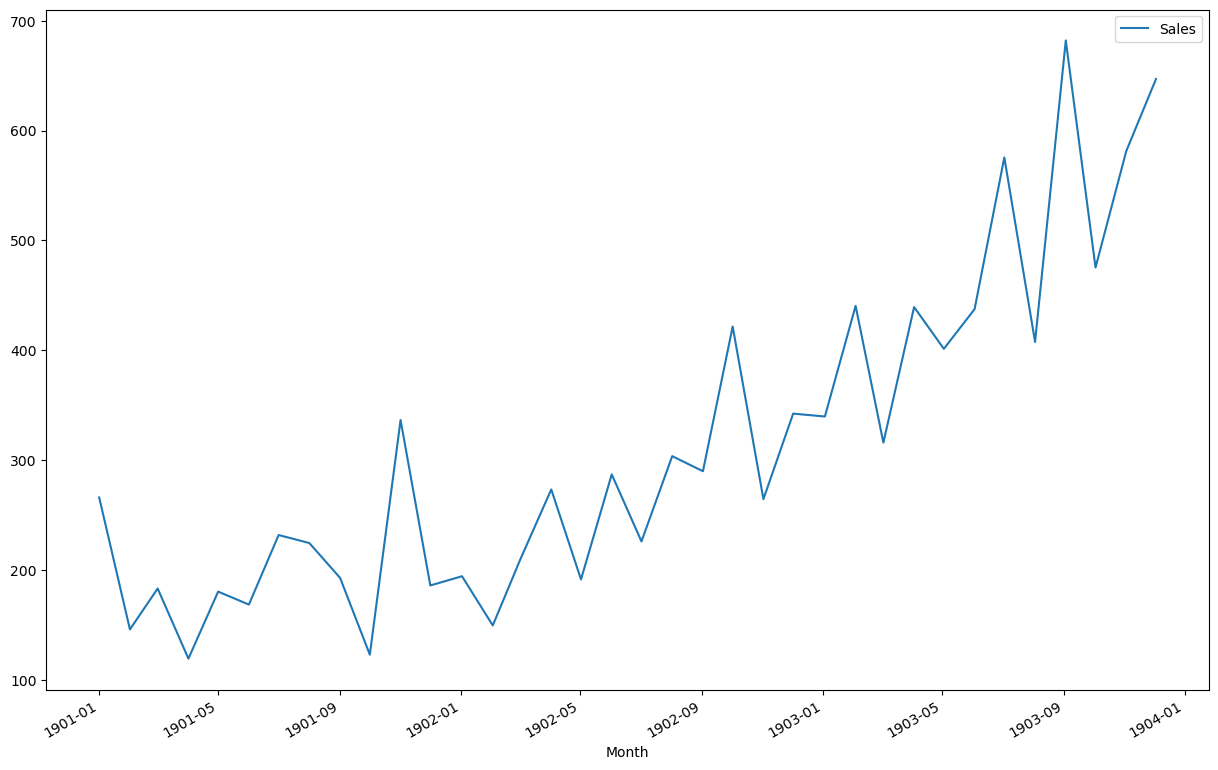

In [96]:
df.plot(figsize=(15,10))
plt.show()

In [185]:
Y = df.values
X = []
for i in range (0,(len(df))):
    X.append(i)

X = np.array(X)
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [186]:
X = X.reshape(-1,1)
Y = Y.flatten()

In [187]:
Y.shape

(36,)

In [188]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [189]:
trend = model.predict(X)

In [191]:
detrended = [Y[i]-trend[i] for i in range(0,len(df))]

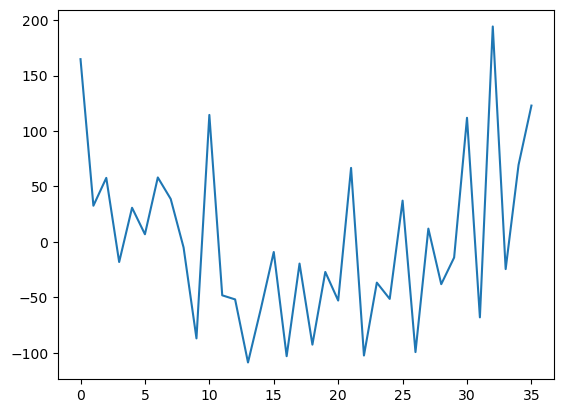

In [194]:
plt.plot(detrended)
plt.show()

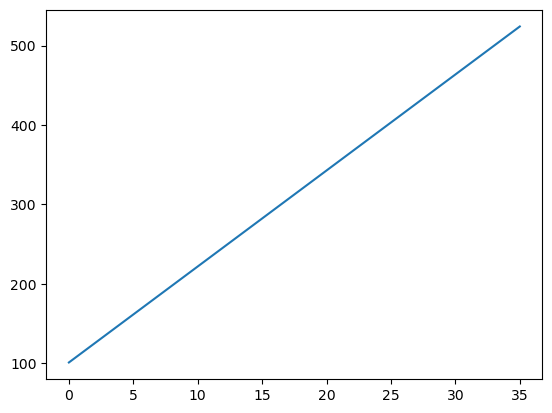

In [195]:
plt.plot(trend)
plt.show()